A Look at Atmospheric CO<sub>2</sub>  
Produced by Thomas J. Pfaff  
Ithaca College  
Updated June 2018

#### Answer the following questions using the fitted curve, $\hat{y} = 310.42336317 + 0.52063260x + 0.01345947x^2$, that is represented in Figure 1.

#### 1. Find a model with output Average CO<sub>2</sub> in PPM and input years (or years after 1950). \[Either delete this question or the figure, in which case provide the data.\]

In [266]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("data.txt")
data["year"] = data["year"] - 1950 # Years after 1950, instead of actual years
data.head()

,year,mean,unc
0,9,315.97,0.12
1,10,316.91,0.12
2,11,317.64,0.12
3,12,318.45,0.12
4,13,318.99,0.12


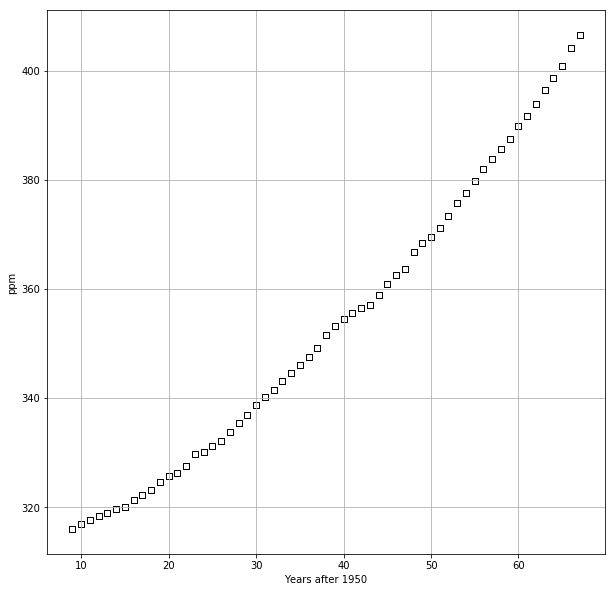

In [256]:
def plot_config(size=(10, 10), xlab = "Years after 1950", ylab = "ppm"):
    plt.figure(figsize=size)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid()

def scatterplot():
    plot_config()
    plt.scatter(data["year"], data["mean"], marker="s", facecolors="none", edgecolors="black")
scatterplot()

In [98]:
# Model given in the question for comparison
old_model = np.poly1d([0.01345947, 0.52063260, 310.42336317])
print("Old model:")
print(old_model, "\n")

# Model using newer data
fit = np.polyfit(data["year"], data["mean"], 2)
model = np.poly1d(fit)
print("New model:")
print(model)

Old model:
         2
0.01346 x + 0.5206 x + 310.4 

New model:
         2
0.01249 x + 0.6027 x + 308.9


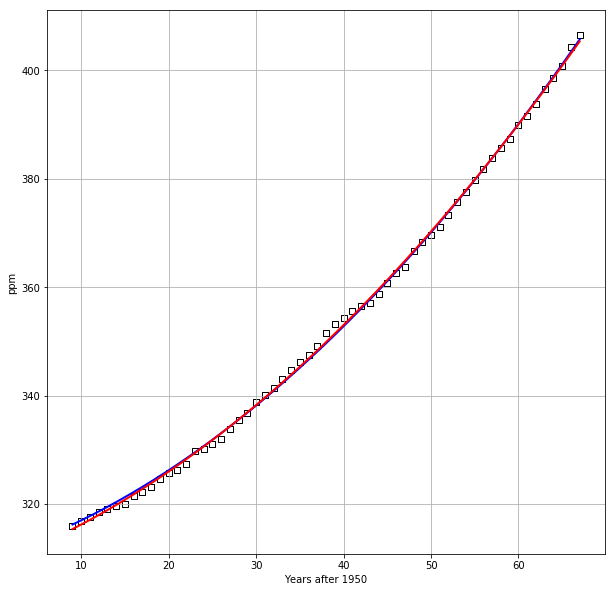

In [257]:
# Plot the models
x = np.linspace(min(data["year"]), max(data["year"]), 1000)
scatterplot()
plt.plot(x, old_model(x), color="blue", lw=2)
plt.plot(x, model(x), color="red", lw=2)

#### Answer 1:
> $0.01249x^2 + 0.6027x + 308.9$

#### 2. According to the model what will CO<sub>2</sub> levels be in 2050?

In [209]:
model(2050 - 1950)

494.0709782199019

#### Answer 2:

> $494.071\text{ppm}$

#### 3. What is the rate of change of CO<sub>2</sub> in 2017 (the last year of the data set) and what is the percentage rate of change?

$$ \hat{y} = 0.01249x^2 + 0.6027x + 308.9 $$
$$ \hat{y}\space' = 0.02498 x + 0.6027 $$

In [340]:
rate_of_change = np.poly1d([model.c[0] * 2, model.c[1]])
print(rate_of_change)

 
0.02497 x + 0.6027


In [343]:
q3a = rate_of_change(2017 - 1950)
q3a

2.276033781313511

#### Answer 3:

> $2.276\text{ ppm/year}$ or $227.6\%$

#### 4. Assuming that CO<sub>2</sub> levels continue to grow constantly at the 2017 rates, what will the CO<sub>2</sub> levels reach in 2050?

In [344]:
q4_model = np.poly1d([q3a, list(data["mean"])[-1]])
print(q4_model)

 
2.276 x + 406.6


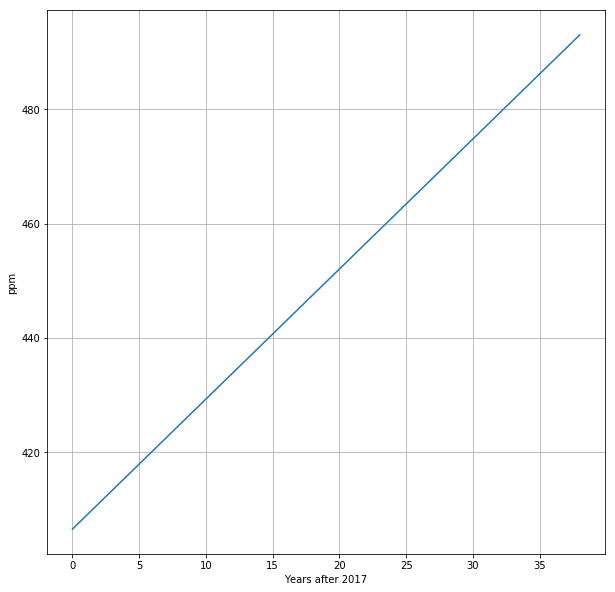

In [345]:
x = np.linspace(0, 2050 - 2017 + 5, 100)
plot_config(xlab = "Years after 2017")
plt.plot(x, q4_model(x))

In [252]:
q4_model(2050 - 2017)

481.66988000000003

#### Answer 4:

> $481.67\text{ ppm}$

#### 5. Atmospheric CO<sub>2</sub> levels of $450\text{ ppm}$ yield a likely chance that global average temperature increases will be at least $2^\circ$ Celsius.[*](https://www.ipcc.ch/site/assets/uploads/2018/02/SYR_AR5_FINAL_full.pdf) According to the model, in what year do we reach a CO<sub>2</sub> level of $450\text{ ppm}$? If we assume CO<sub>2</sub> levels continue to grow constantly at the 2017 rates, in what year do we reach a CO<sub>2</sub> level of $450\text{ ppm}$?

In [365]:
q5a_m1 = np.poly1d([model.c[0], model.c[1], model.c[2] - 450])
q5a_p1 = max(q5a_m1.roots)
q5a_p1

84.86137790253937

In [349]:
# Verify answer is correct
model(q5a_p1)

450.0

In [366]:
q5a_m2 = np.poly1d([q4_model.c[0], q4_model.c[1] - 450])
q5a_p2 = max(q5a_m2.roots)
q5a_p2 # Years after 2017

19.09022632121249

In [367]:
2017 - 1950 + q5a_p2 # Years after 1950

86.0902263212125

In [351]:
# Verify answer is correct
q4_model(q5a_p2)

450.0

#### Answer 5:

> According to the model, we reach a CO<sub>2</sub> level of 450 ppm 84.86 years after 1950, so in the year $2034$.

> If we assume CO<sub>2</sub> levels continue to grow constantly at the 2017 rates, we would reach a CO<sub>2</sub> level of 450ppm in 86.09 years after 1950, so the year $2036$.

#### NOTE: According to Warren[**](https://scholar.google.com/scholar_lookup?title=Impacts%20of%20global%20climate%20change%20at%20different%20annual%20mean%20global%20temperature%20increases&author=R.%20Warren&pages=93-131&publication_year=2006), at $1^\circ$ Celsius, in addition to the trends we are already observing, oceans will further acidify, natural ecosystems will start to collapse, and as many as 18-60 million people in the developing world will go hungry. At $1.5^\circ$ Celsius the Greenland ice sheet will melt, eventually causing a 7m rise in sea level, inundating coastal areas. At $2^\circ$ Celsius agricultural yields in the rich nations will start to fall and 1-3 billion people will experience water scarcity. At $3^\circ$ Celsius the Amazon rainforest is expected to collapse and at $4^\circ$ Celsius most of Africa and Australia will lose all agricultural production.

#### 6. Fill in the blank: In order to avoid reaching 450ppm of atmospheric CO<sub>2</sub> the trend in the data would have to become (???Calculus Term???).

#### Answer 6:

> 450 as the limit of $x$ approaches 84.86.

#### 7. Provide a (general or real world related) question that you would like answered based on your work here. This should not be something that you could answer yourself with a little work.

#### Answer 7:

> How could we leverage artificial intelligence to optimize CO<sub>2</sub> emissions?

#### 8. Summarize your work on questions 1-5 in a short paragraph as if it were a news article.

#### Answer 8:

> Carbon dioxide in the Earth's atmosphere is growing at an exponential rate. This is a concern as atmospheric carbon dioxide has been known to be a significant factor in climate change on Earth. Climate change can be devastating, as shown in the note provided. My work predicts the amount of atmospheric carbon dioxide for each year and the rate at which it is produced each year. Additionally, it visualizes those predictions on graphs generated by matplotlib.